In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
df_raw = pd.read_csv('train.csv', low_memory = False)


In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [5]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [6]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

## Initial preprocessing

In [7]:
train_cats(df_raw)

In [8]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [9]:
os.makedirs('tmp', exist_ok = True)
df_raw.to_feather('tmp/dataset-raw')

In [10]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [11]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(df, y)
m.score(df, y)

/home/skessler/.local/lib/python3.8/site-packages/sklearn/ensemble/forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The default value of n_estimators will change from "


0.9749501756968074

In [12]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = int(0.2 * len(df))
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 83), (1168,), (292, 83), (292,))

In [13]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [14]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/skessler/.local/lib/python3.8/site-packages/sklearn/ensemble/forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The default value of n_estimators will change from "


CPU times: user 219 ms, sys: 3.85 ms, total: 223 ms
Wall time: 65.8 ms
[0.06638762915322445, 0.15632928890794281, 0.9726341760342714, 0.8402289869517617]


In [15]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([12.38839, 12.17303, 12.11833, 12.27839, 12.45293, 12.53177, 12.07539, 11.96718, 12.20857, 12.45293]),
 12.26469368490656,
 12.367340793126296)

In [16]:
preds.shape

(10, 292)

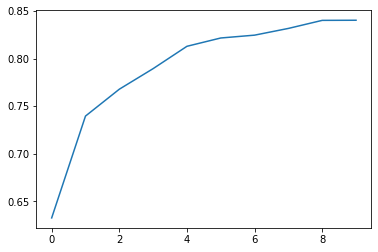

In [17]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

In [18]:
set_rf_samples(1000)

In [19]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 192 ms, sys: 0 ns, total: 192 ms
Wall time: 50.6 ms
[0.07548499604374054, 0.1582128328006561, 0.964620191035609, 0.8363557698467128]


In [20]:
reset_rf_samples()

In [21]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.4, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08182367666425076, 0.1448364152163006, 0.9584288354541798, 0.8628572611138624, 0.8640532810996251]


In [22]:
fi = rf_feat_importance(m, df)
fi[:10]

,cols,imp
17,OverallQual,0.285138
46,GrLivArea,0.162550
19,YearBuilt,0.087011
61,GarageCars,0.051357
27,ExterQual,0.043396
38,TotalBsmtSF,0.041766
62,GarageArea,0.039918
43,1stFlrSF,0.036967
49,FullBath,0.032540
34,BsmtFinSF1,0.017692


/home/skessler/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='cols'>

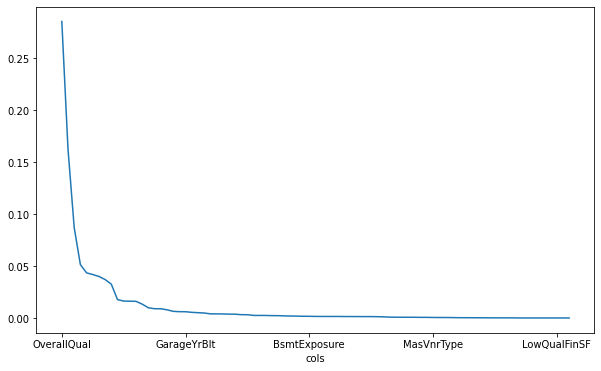

In [23]:
fi.plot('cols', 'imp', figsize = (10, 6), legend = False)

In [29]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

23

In [31]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [41]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.4,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08604364458994727, 0.14262789005862692, 0.9540302855807589, 0.8670077911435997, 0.8678778284341573]


<AxesSubplot:ylabel='cols'>

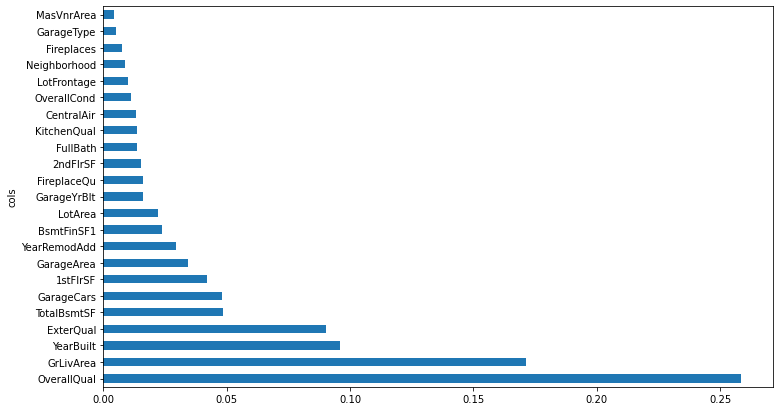

In [43]:
fi = rf_feat_importance(m, df_keep)

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi)

In [52]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat = 7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.4, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07956734942473632, 0.14553791384617665, 0.9606899141578181, 0.861525573591508, 0.8687992319040097]
